In [1]:
#importing the necessary libraries

import numpy as np
import tensorflow as tf
from keras.models import Sequential
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dropout
from keras.layers.core import Dense
from keras.layers import Embedding
from keras import Model
from keras.layers import Input
from keras import optimizers
from keras import layers
import os
from matplotlib import pyplot as plt
from keras.datasets import reuters
from keras import preprocessing
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from keras.layers import LSTM

In [4]:
#connecting to Goole Drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
#Downloading the data from keras

features = 10000
length = 100

#splitting the data into train and test datasets

(reuterstext_train, reuterslabel_train),(reuterstext_test, reuterslabel_test) = reuters.load_data(num_words = features)

reuterstext_train = pad_sequences(reuterstext_train, maxlen = length)
reuterstext_test = pad_sequences(reuterstext_test, maxlen = length)

reuterslabel_train = to_categorical(reuterslabel_train)
reuterslabel_test = to_categorical(reuterslabel_test)

In [20]:
#Defining the model

dimension_embbed = 100

model = Sequential()

model.add(Embedding(features, dimension_embbed, input_length=length))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(46,activation='softmax'))
model.summary()

#training the model

model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['acc'])
output = model.fit(reuterstext_train,reuterslabel_train, epochs=10,batch_size=32,validation_split=0.2)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 100, 100)          1000000   
                                                                 
 flatten_4 (Flatten)         (None, 10000)             0         
                                                                 
 dense_8 (Dense)             (None, 128)               1280128   
                                                                 
 dense_9 (Dense)             (None, 46)                5934      
                                                                 
Total params: 2,286,062
Trainable params: 2,286,062
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
225/225 [==============================] - 2s 8ms/step - loss: 1.7985 - acc: 0.5457 - val_loss: 1.4460 - val_acc: 0.6472
Epoch 2/10
225/225 [========================

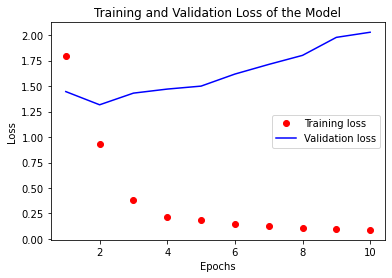

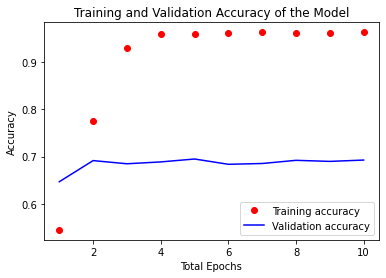

In [21]:
#Displaying Training and Validation Loss

training_loss = output.history['loss']
validation_loss = output.history['val_loss']
noofepochs = range(1,len(training_loss)+1)
plt.plot(noofepochs,training_loss,'ro',label='Training loss') 
plt.plot(noofepochs,validation_loss,'b',label='Validation loss') 
plt.title("Training and Validation Loss of the Model")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

#Displaying Training and Validation Accuracy

plt.clf()
training_accuracy_values = output.history['acc']
validation_accuracy_values = output.history['val_acc']
plt.plot(noofepochs,training_accuracy_values,'ro',label='Training accuracy')
plt.plot(noofepochs,validation_accuracy_values,'b',label='Validation accuracy')
plt.title('Training and Validation Accuracy of the Model')
plt.xlabel('Total Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [22]:
model.save('/content/gdrive/MyDrive/Reuters')

In [23]:
#testing the model

testmodel = model.evaluate(reuterstext_test,reuterslabel_test)
print(testmodel)

71/71 [==============================] - 0s 2ms/step - loss: 2.0079 - acc: 0.6794
[2.0079426765441895, 0.6794301271438599]


In [10]:
#using the GloVe file to initialize weights in the embedding layer

!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip -q glove.6B.zip

i_word = reuters.get_word_index()
i_embbed = {}


path = '/content/glove.6B.100d.txt'

with open(path) as f:
  for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:],dtype='float32')
    i_embbed[word] = coefs
f.close()
print("Found %s words vectors." %len(i_embbed))

#embedding matrix to load in the embedding layer
embedding_matrix = np.zeros((features,dimension_embbed))

for word,i in i_word.items():
    if i < features:
        embeddings_vector = i_embbed.get(word)
        if embeddings_vector is not None:
            embedding_matrix[i] = embeddings_vector
        

--2022-11-22 03:03:12--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2022-11-22 03:03:13--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2022-11-22 03:03:14--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glov

In [15]:
#Building the model with weights frozen

model = Sequential()

model.add(Embedding(features,dimension_embbed,input_length=length))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(46,activation='softmax'))

#loading the embedding matrix
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False

model.summary()

model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['acc'])
output1 = model.fit(reuterstext_train,reuterslabel_train, epochs=10,batch_size=32,validation_split=0.2)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 100, 100)          1000000   
                                                                 
 flatten_3 (Flatten)         (None, 10000)             0         
                                                                 
 dense_6 (Dense)             (None, 128)               1280128   
                                                                 
 dense_7 (Dense)             (None, 46)                5934      
                                                                 
Total params: 2,286,062
Trainable params: 1,286,062
Non-trainable params: 1,000,000
_________________________________________________________________
Epoch 1/10
225/225 [==============================] - 2s 5ms/step - loss: 2.2822 - acc: 0.4383 - val_loss: 2.0621 - val_acc: 0.4858
Epoch 2/10
225/225 [================

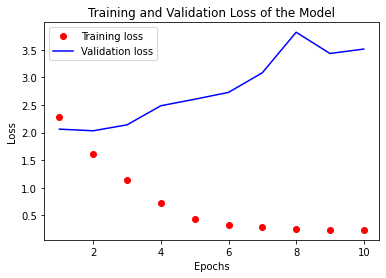

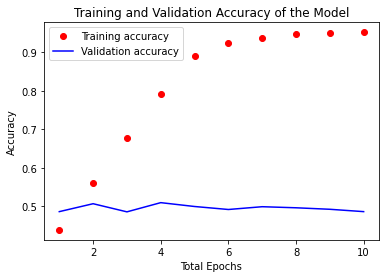

In [16]:
#Displaying Training and Validation Loss

training_loss = output1.history['loss']
validation_loss = output1.history['val_loss']
noofepochs = range(1,len(training_loss)+1)
plt.plot(noofepochs,training_loss,'ro',label='Training loss') 
plt.plot(noofepochs,validation_loss,'b',label='Validation loss') 
plt.title("Training and Validation Loss of the Model")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

#Displaying Training and Validation Accuracy

plt.clf()
training_accuracy_values = output1.history['acc']
validation_accuracy_values = output1.history['val_acc']
plt.plot(noofepochs,training_accuracy_values,'ro',label='Training accuracy')
plt.plot(noofepochs,validation_accuracy_values,'b',label='Validation accuracy')
plt.title('Training and Validation Accuracy of the Model')
plt.xlabel('Total Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [17]:
model.save('/content/gdrive/MyDrive/Reutersfreeze')

In [24]:
evaluate = model.evaluate(reuterstext_test,reuterslabel_test)
print(evaluate)

71/71 [==============================] - 0s 2ms/step - loss: 2.0079 - acc: 0.6794
[2.0079426765441895, 0.6794301271438599]


In [25]:
#unfreezing the weights and training the model again

model.layers[0].trainable = True
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['acc'])
output2 = model.fit(reuterstext_train,reuterslabel_train,epochs=10,batch_size=32,validation_split=0.2)

Epoch 1/10
225/225 [==============================] - 2s 5ms/step - loss: 0.0911 - acc: 0.9630 - val_loss: 2.1764 - val_acc: 0.6834
Epoch 2/10
225/225 [==============================] - 1s 5ms/step - loss: 0.0782 - acc: 0.9624 - val_loss: 2.5149 - val_acc: 0.6767
Epoch 3/10
225/225 [==============================] - 1s 4ms/step - loss: 0.0728 - acc: 0.9620 - val_loss: 2.3958 - val_acc: 0.6772
Epoch 4/10
225/225 [==============================] - 1s 4ms/step - loss: 0.0702 - acc: 0.9620 - val_loss: 2.6004 - val_acc: 0.6767
Epoch 5/10
225/225 [==============================] - 1s 6ms/step - loss: 0.0661 - acc: 0.9641 - val_loss: 2.8264 - val_acc: 0.6750
Epoch 6/10
225/225 [==============================] - 1s 6ms/step - loss: 0.0672 - acc: 0.9652 - val_loss: 2.8244 - val_acc: 0.6672
Epoch 7/10
225/225 [==============================] - 1s 6ms/step - loss: 0.0659 - acc: 0.9648 - val_loss: 2.9248 - val_acc: 0.6617
Epoch 8/10
225/225 [==============================] - 1s 5ms/step - loss: 0.

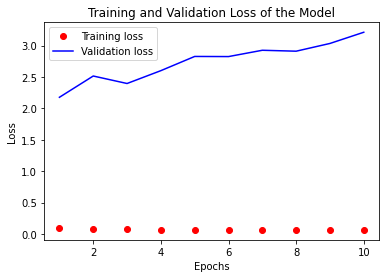

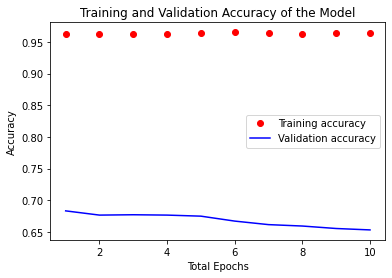

In [26]:
#Displaying Training and Validation Loss

training_loss = output2.history['loss']
validation_loss = output2.history['val_loss']
noofepochs = range(1,len(training_loss)+1)
plt.plot(noofepochs,training_loss,'ro',label='Training loss') 
plt.plot(noofepochs,validation_loss,'b',label='Validation loss') 
plt.title("Training and Validation Loss of the Model")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

#Displaying Training and Validation Accuracy

plt.clf()
training_accuracy_values = output2.history['acc']
validation_accuracy_values = output2.history['val_acc']
plt.plot(noofepochs,training_accuracy_values,'ro',label='Training accuracy')
plt.plot(noofepochs,validation_accuracy_values,'b',label='Validation accuracy')
plt.title('Training and Validation Accuracy of the Model')
plt.xlabel('Total Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [28]:
test = model.evaluate(reuterstext_test,reuterslabel_test)
print(test)

71/71 [==============================] - 0s 3ms/step - loss: 3.0941 - acc: 0.6509
[3.0940563678741455, 0.6509349942207336]


In [29]:
model.save('/content/gdrive/MyDrive/ReutersUnFreeze')

In [31]:
#Building the model with LSTM layer

model = Sequential()

model.add(Embedding(features,dimension_embbed, input_length=length))
#Replacing the fully connected layer with LSTM layer
model.add(LSTM(64,return_sequences=True))
model.add(Flatten())
model.add(Dense(46,activation='softmax'))

#training the model
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics = ['acc'])
output3 = model.fit(reuterstext_train,reuterslabel_train,epochs=10,batch_size=32,validation_split=0.2)

Epoch 1/10
225/225 [==============================] - 9s 12ms/step - loss: 1.7492 - acc: 0.5457 - val_loss: 1.4688 - val_acc: 0.6450
Epoch 2/10
225/225 [==============================] - 3s 12ms/step - loss: 1.1141 - acc: 0.7186 - val_loss: 1.2491 - val_acc: 0.6934
Epoch 3/10
225/225 [==============================] - 2s 9ms/step - loss: 0.8123 - acc: 0.7965 - val_loss: 1.1444 - val_acc: 0.7334
Epoch 4/10
225/225 [==============================] - 2s 9ms/step - loss: 0.6035 - acc: 0.8519 - val_loss: 1.2222 - val_acc: 0.7318
Epoch 5/10
225/225 [==============================] - 2s 9ms/step - loss: 0.4366 - acc: 0.8941 - val_loss: 1.2334 - val_acc: 0.7273
Epoch 6/10
225/225 [==============================] - 3s 11ms/step - loss: 0.3157 - acc: 0.9261 - val_loss: 1.3590 - val_acc: 0.7212
Epoch 7/10
225/225 [==============================] - 3s 13ms/step - loss: 0.2461 - acc: 0.9417 - val_loss: 1.4689 - val_acc: 0.7179
Epoch 8/10
225/225 [==============================] - 3s 14ms/step - los

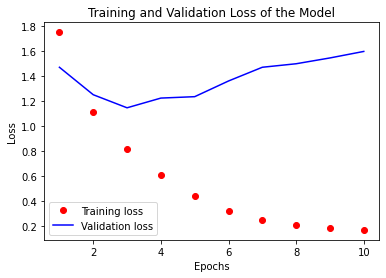

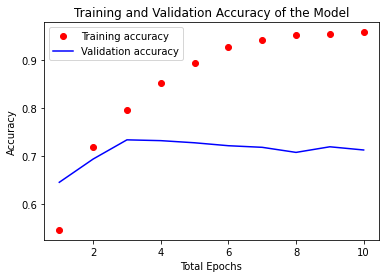

In [32]:
#Displaying Training and Validation Loss

training_loss = output3.history['loss']
validation_loss = output3.history['val_loss']
noofepochs = range(1,len(training_loss)+1)
plt.plot(noofepochs,training_loss,'ro',label='Training loss') 
plt.plot(noofepochs,validation_loss,'b',label='Validation loss') 
plt.title("Training and Validation Loss of the Model")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

#Displaying Training and Validation Accuracy

plt.clf()
training_accuracy_values = output3.history['acc']
validation_accuracy_values = output3.history['val_acc']
plt.plot(noofepochs,training_accuracy_values,'ro',label='Training accuracy')
plt.plot(noofepochs,validation_accuracy_values,'b',label='Validation accuracy')
plt.title('Training and Validation Accuracy of the Model')
plt.xlabel('Total Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [33]:
test = model.evaluate(reuterstext_test,reuterslabel_test)
print(test)

71/71 [==============================] - 0s 5ms/step - loss: 1.6242 - acc: 0.6999
[1.6241992712020874, 0.6999109387397766]


In [34]:
model.save('/content/gdrive/MyDrive/ReutersLSTM')

In [35]:
#Building the model with 2 LSTM layers

model = Sequential()

model.add(Embedding(features,dimension_embbed, input_length=length))
model.add(LSTM(32,return_sequences=True))
model.add(LSTM(64,return_sequences=True))
model.add(Flatten())
model.add(Dense(46,activation='softmax'))

#training the model
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics = ['acc'])
output4 = model.fit(reuterstext_train,reuterslabel_train,epochs=10,batch_size=32,validation_split=0.2)

Epoch 1/10
225/225 [==============================] - 8s 23ms/step - loss: 1.7605 - acc: 0.5399 - val_loss: 1.4142 - val_acc: 0.6466
Epoch 2/10
225/225 [==============================] - 4s 16ms/step - loss: 1.1800 - acc: 0.7045 - val_loss: 1.2466 - val_acc: 0.6900
Epoch 3/10
225/225 [==============================] - 3s 14ms/step - loss: 0.9177 - acc: 0.7697 - val_loss: 1.2320 - val_acc: 0.7051
Epoch 4/10
225/225 [==============================] - 4s 16ms/step - loss: 0.7379 - acc: 0.8088 - val_loss: 1.4461 - val_acc: 0.6288
Epoch 5/10
225/225 [==============================] - 4s 16ms/step - loss: 0.5907 - acc: 0.8475 - val_loss: 1.3046 - val_acc: 0.6978
Epoch 6/10
225/225 [==============================] - 5s 21ms/step - loss: 0.4558 - acc: 0.8831 - val_loss: 1.4659 - val_acc: 0.7040
Epoch 7/10
225/225 [==============================] - 4s 17ms/step - loss: 0.3656 - acc: 0.9068 - val_loss: 1.6162 - val_acc: 0.6878
Epoch 8/10
225/225 [==============================] - 3s 13ms/step - 

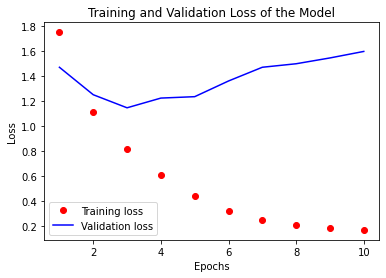

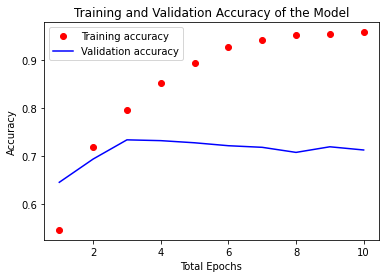

In [36]:
#Displaying Training and Validation Loss

training_loss = output3.history['loss']
validation_loss = output3.history['val_loss']
noofepochs = range(1,len(training_loss)+1)
plt.plot(noofepochs,training_loss,'ro',label='Training loss') 
plt.plot(noofepochs,validation_loss,'b',label='Validation loss') 
plt.title("Training and Validation Loss of the Model")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

#Displaying Training and Validation Accuracy

plt.clf()
training_accuracy_values = output3.history['acc']
validation_accuracy_values = output3.history['val_acc']
plt.plot(noofepochs,training_accuracy_values,'ro',label='Training accuracy')
plt.plot(noofepochs,validation_accuracy_values,'b',label='Validation accuracy')
plt.title('Training and Validation Accuracy of the Model')
plt.xlabel('Total Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [37]:
test = model.evaluate(reuterstext_test,reuterslabel_test)
print(test)

71/71 [==============================] - 1s 8ms/step - loss: 1.9222 - acc: 0.6612
[1.9222339391708374, 0.6611754298210144]


In [38]:
model.save('/content/gdrive/MyDrive/ReutersAddLSTM')